In [92]:
import aipy
import numpy as np

In [93]:
def random_complex(size, scale=1):
    num = np.random.normal(size=(size, 2), scale=scale/np.sqrt(2))
    return num[:, 0] + 1j*num[:, 1]

In [94]:
np.mean(np.abs(random_complex(int(1e5)))**2)

0.9958895293505113

In [95]:
LMAX

64

In [113]:
alm = aipy.healpix.Alm(lmax=LMAX, mmax=LMAX)
alm.set_data(random_complex(alm.size()))

In [114]:
NSIDE = 64

In [115]:
hpm = aipy.healpix.HealpixMap(nside=NSIDE)
hpm.map = alm.to_map(nside=NSIDE)
print(f"npix={hpm.map.size}")

npix=49152


In [108]:
hpm.scheme()

'RING'

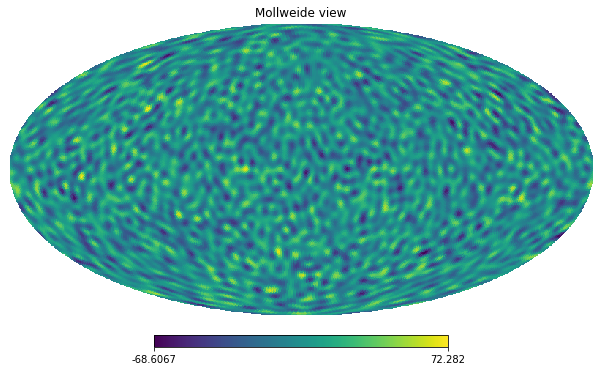

In [118]:
import healpy as hp
hp.mollview(hpm.map)

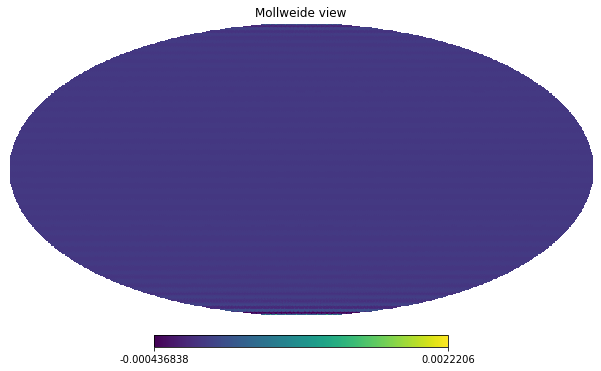

In [119]:
LMAX=64
#alm = hpm.to_alm(lmax=LMAX, mmax=LMAX)
alm = aipy.healpix.Alm(lmax=LMAX, mmax=LMAX)
alm.from_map(hpm.map, iter=1)
hp.mollview(alm.to_map(nside=NSIDE) - hpm.map)#/hpm.map)

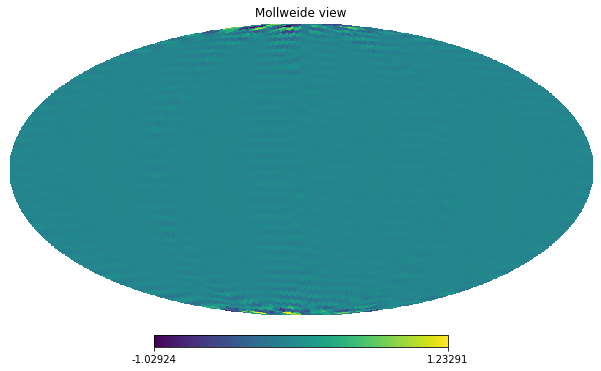

In [105]:
LMAX=64
#alm = hpm.to_alm(lmax=LMAX, mmax=LMAX)
alm = aipy.healpix.Alm(lmax=LMAX, mmax=LMAX)
rec = hp.alm2map(hp.map2alm(hpm.map, lmax=LMAX, mmax=LMAX, use_pixel_weights=True), nside=NSIDE)
#alm.from_map(hpm.map, iter=1, use_pixel_weight)
hp.mollview(rec - hpm.map)#/hpm.map)

In [24]:
data = np.random.random(size=hpm.map.size) 
recover = hp.alm2map(hp.map2alm(data, lmax=data.size, mmax=data.size), nside=16)

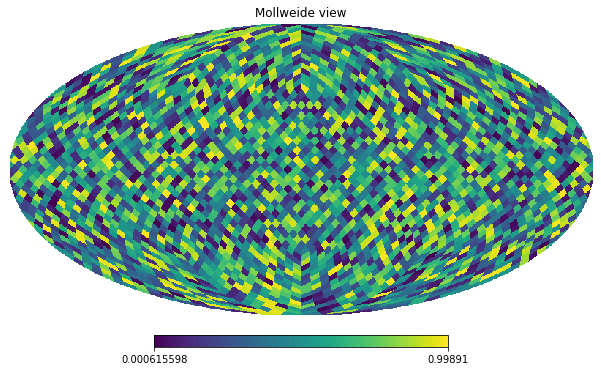

In [28]:
hp.mollview(data)

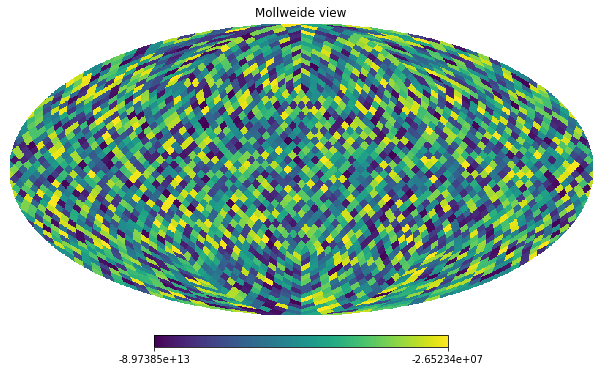

In [29]:
hp.mollview(recover)

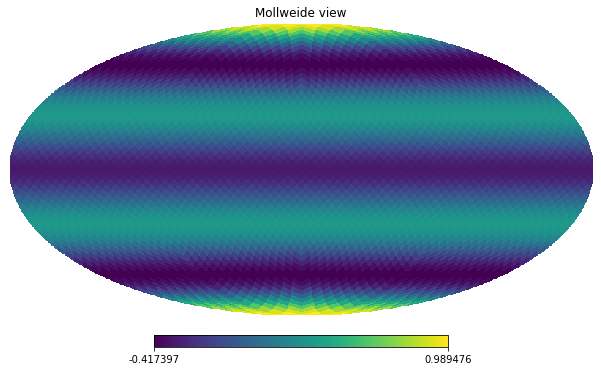

In [46]:
alm = aipy.healpix.Alm(lmax=10, mmax=10)
alm[6,0] = 1
hp.mollview(alm.to_map(nside=16))
alm.from_map(alm.to_map(nside=16))

In [47]:
alm.get_data()

array([-2.29114527e-09+0.00000000e+00j, -1.13837012e-19+0.00000000e+00j,
       -5.25897882e-09+0.00000000e+00j, -1.39028161e-18+0.00000000e+00j,
       -7.18296195e-09+0.00000000e+00j, -1.35416592e-18+0.00000000e+00j,
        9.99999991e-01+0.00000000e+00j,  4.90450408e-18+0.00000000e+00j,
       -9.68969272e-09+0.00000000e+00j, -9.47156029e-18+0.00000000e+00j,
       -1.09310412e-08+0.00000000e+00j,  5.52176814e-19-1.24525798e-19j,
       -3.92516712e-22+2.43663178e-22j,  1.09925556e-18-1.10067081e-19j,
       -7.53612594e-22+4.67821201e-22j,  2.16326291e-19+4.40343158e-19j,
       -8.49070640e-22+5.27078833e-22j, -9.13183410e-19+9.22468148e-19j,
       -5.83097568e-22+3.61970337e-22j, -2.49013765e-19+5.79744515e-19j,
       -5.32467197e-23+3.30540447e-23j,  4.34734796e-19+4.83654721e-20j,
       -1.47699444e-22+1.17786376e-22j,  9.60335136e-19+4.88666961e-19j,
       -3.99091811e-22+3.18265099e-22j,  3.18991478e-19+9.93523637e-19j,
       -6.43086899e-22+5.12844689e-22j, -3.05402237

In [51]:
alm[6,0] = 0

In [52]:
np.sort(alm.get_data().real)

array([-1.09310412e-08, -9.68969272e-09, -7.18296195e-09, -5.25897882e-09,
       -2.29114527e-09, -2.35349606e-11, -8.93165680e-12, -2.64030459e-12,
       -3.88944901e-13, -1.34873711e-14, -9.74866416e-16, -9.47156029e-18,
       -1.39028161e-18, -1.35416592e-18, -9.13183410e-19, -3.05402237e-19,
       -2.49013765e-19, -1.13837012e-19, -3.15736270e-20, -7.25925196e-21,
       -8.49070640e-22, -7.53612594e-22, -7.31443701e-22, -6.43086899e-22,
       -6.35528252e-22, -5.83097568e-22, -4.27174069e-22, -3.99091811e-22,
       -3.92516712e-22, -2.07999007e-22, -1.47699444e-22, -6.01822050e-23,
       -5.32467197e-23, -4.35062286e-23, -1.41103247e-23, -1.03312855e-23,
       -7.68722922e-24, -3.57067979e-24, -1.21344537e-24, -7.24194320e-25,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.42236271e-25,
        1.98243908e-22,  2.34520951e-22,  2.45883966e-20,  2.81415759e-20,
        3.22634363e-20,  4.60515961e-20,  6.14242615e-20,  1.16011049e-19,
        1.84778043e-19,  

In [56]:
LMAX = 10
NSIDE = 16

for l in range(LMAX):
    for m in range(l):
        alm = aipy.healpix.Alm(lmax=LMAX, mmax=LMAX)
        alm[l, m] = 1
        hp_map = alm.to_map(nside=NSIDE)
        alm.from_map(hp_map)
        assert np.isclose(alm[l, m], 1, atol=1e-3)
        alm[l, m] = 0
        assert np.allclose(alm.get_data(), 0, atol=1e-7), f"{l=}, {m=}"

In [25]:
np.array([alm._alm.getlm(alm._lmax, i) for i in range(alm.size())])

array([[ 0,  0],
       [ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [ 5,  0],
       [ 6,  0],
       [ 7,  0],
       [ 8,  0],
       [ 9,  0],
       [10,  0],
       [ 1,  1],
       [ 2,  1],
       [ 3,  1],
       [ 4,  1],
       [ 5,  1],
       [ 6,  1],
       [ 7,  1],
       [ 8,  1],
       [ 9,  1],
       [10,  1],
       [ 2,  2],
       [ 3,  2],
       [ 4,  2],
       [ 5,  2],
       [ 6,  2],
       [ 7,  2],
       [ 8,  2],
       [ 9,  2],
       [10,  2],
       [ 3,  3],
       [ 4,  3],
       [ 5,  3],
       [ 6,  3],
       [ 7,  3],
       [ 8,  3],
       [ 9,  3],
       [10,  3],
       [ 4,  4],
       [ 5,  4],
       [ 6,  4],
       [ 7,  4],
       [ 8,  4],
       [ 9,  4],
       [10,  4],
       [ 5,  5],
       [ 6,  5],
       [ 7,  5],
       [ 8,  5],
       [ 9,  5],
       [10,  5],
       [ 6,  6],
       [ 7,  6],
       [ 8,  6],
       [ 9,  6],
       [10,  6],
       [ 7,  7],
       [ 8,  7],
       [ 9,  7

In [22]:
alm.lm_indices()

TypeError: 'method' object cannot be interpreted as an integer